# Positional Encoding - Combination of Sequence Length and Embedding Dimension

### Observation
### More Positions, More Cycle i.e., More patterns or More Sequence or More Generelization
### More Embeddings, More Granularity i,e., More positional relation between words, wrods will be positioned/placed better in a sentence

#### If the position increases for the same dimensionthe input value will increase

1. With smaller positions or sequence lengths, the model may not be able to generate or understand longer sequences effectively because it hasn't been trained on longer combinations of words.
2. With smaller embeddings, the model may not be able to capture the relationships between words effectively, as the reduced dimensionality limits its ability to represent nuanced word interactions.

| Hypothesis                           | Purpose                                              | Input Values                                                                               | Effect on Sine and Cosine                                                                                                                                                     |
|--------------------------------------|------------------------------------------------------|--------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| High Sequence Length (High seq_len)  | To test the model's ability to handle long sequences | Positional indices will range widely, covering more cycles of the sine and cosine functions | The sine and cosine values will oscillate more rapidly, covering multiple cycles, helping distinguish different parts of the sequence                                        |
| Low Sequence Length (Low seq_len)    | To test the model's ability to handle shorter sequences | Positional indices are limited, resulting in fewer cycles of the sine and cosine functions  | The values will oscillate less frequently, leading to smoother transitions, suitable for capturing positional information in shorter sequences                               |
| High Embedding Dimension (High embedding_dim) | To explore the effect of having a high-dimensional representation of positions | Higher embedding dimension means broader angle rates, resulting in finer granularity of encoding | The sine and cosine functions will cover a wider spectrum of frequencies, capturing more nuanced positional information                                                       |
| Low Embedding Dimension (Low embedding_dim)  | To test the effect of having a low-dimensional representation of positions | Lower embedding dimension means more compressed angle rates                                | Fewer frequencies are available, resulting in a coarse-grained positional encoding, which might be less effective at capturing fine-grained positional information |


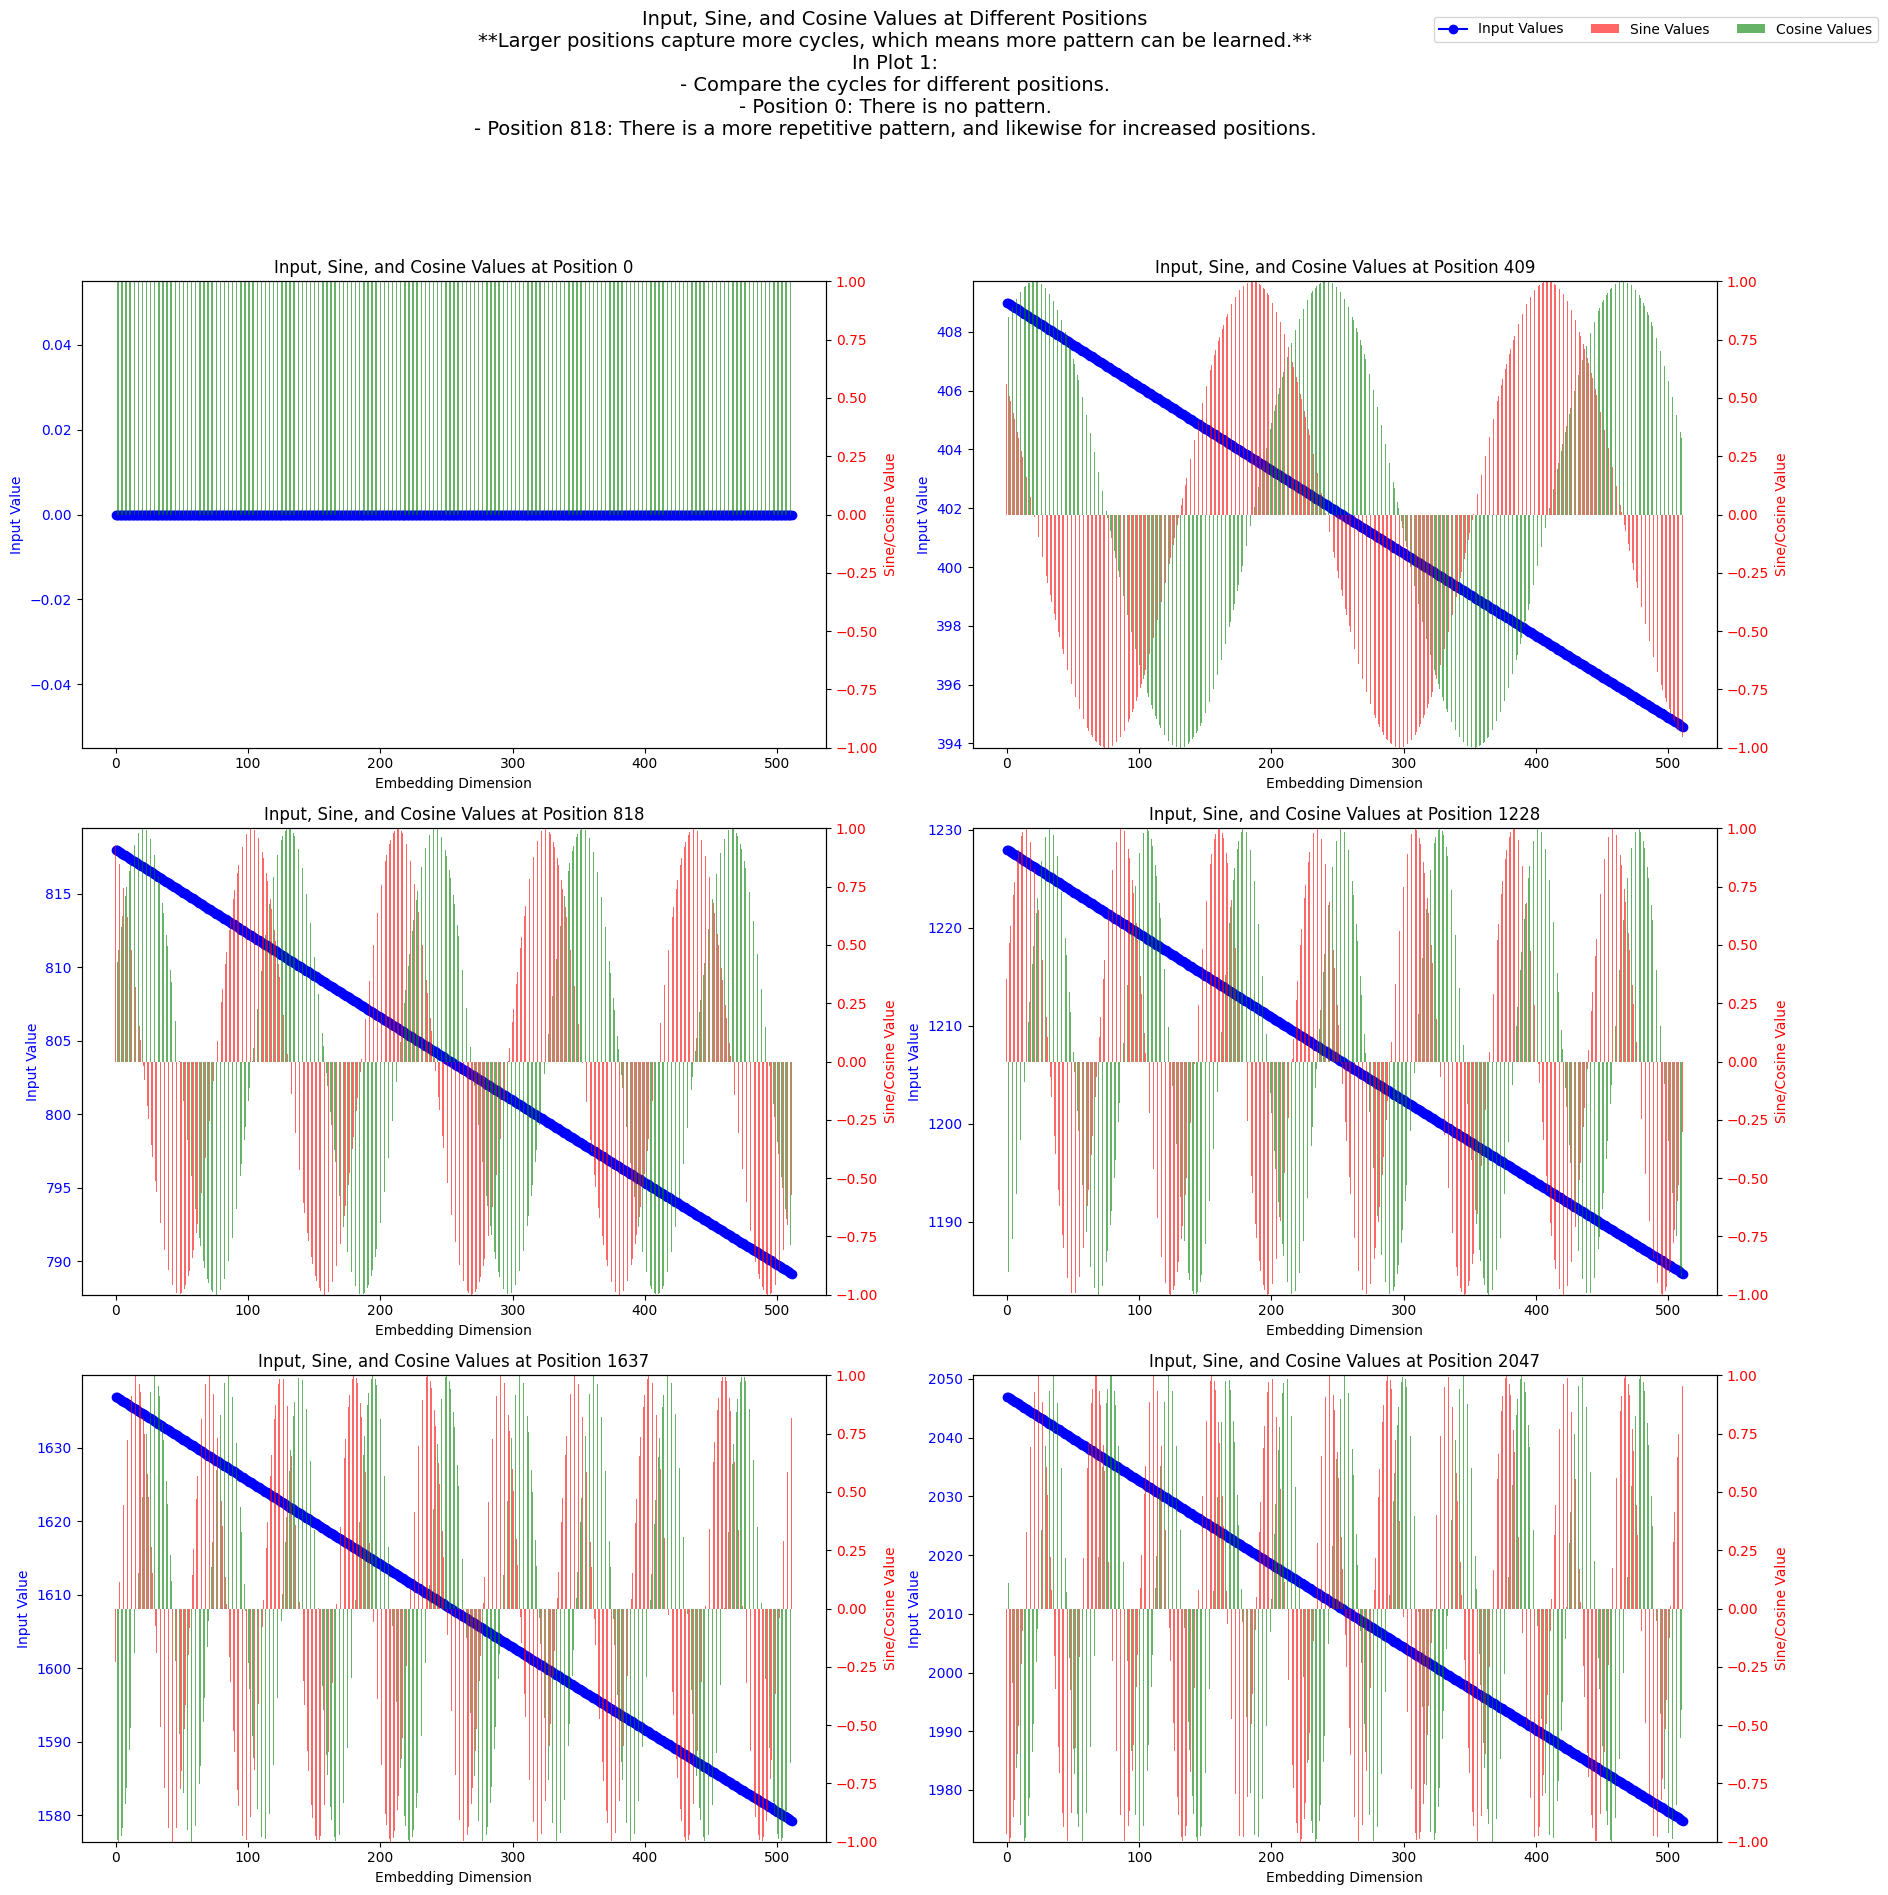

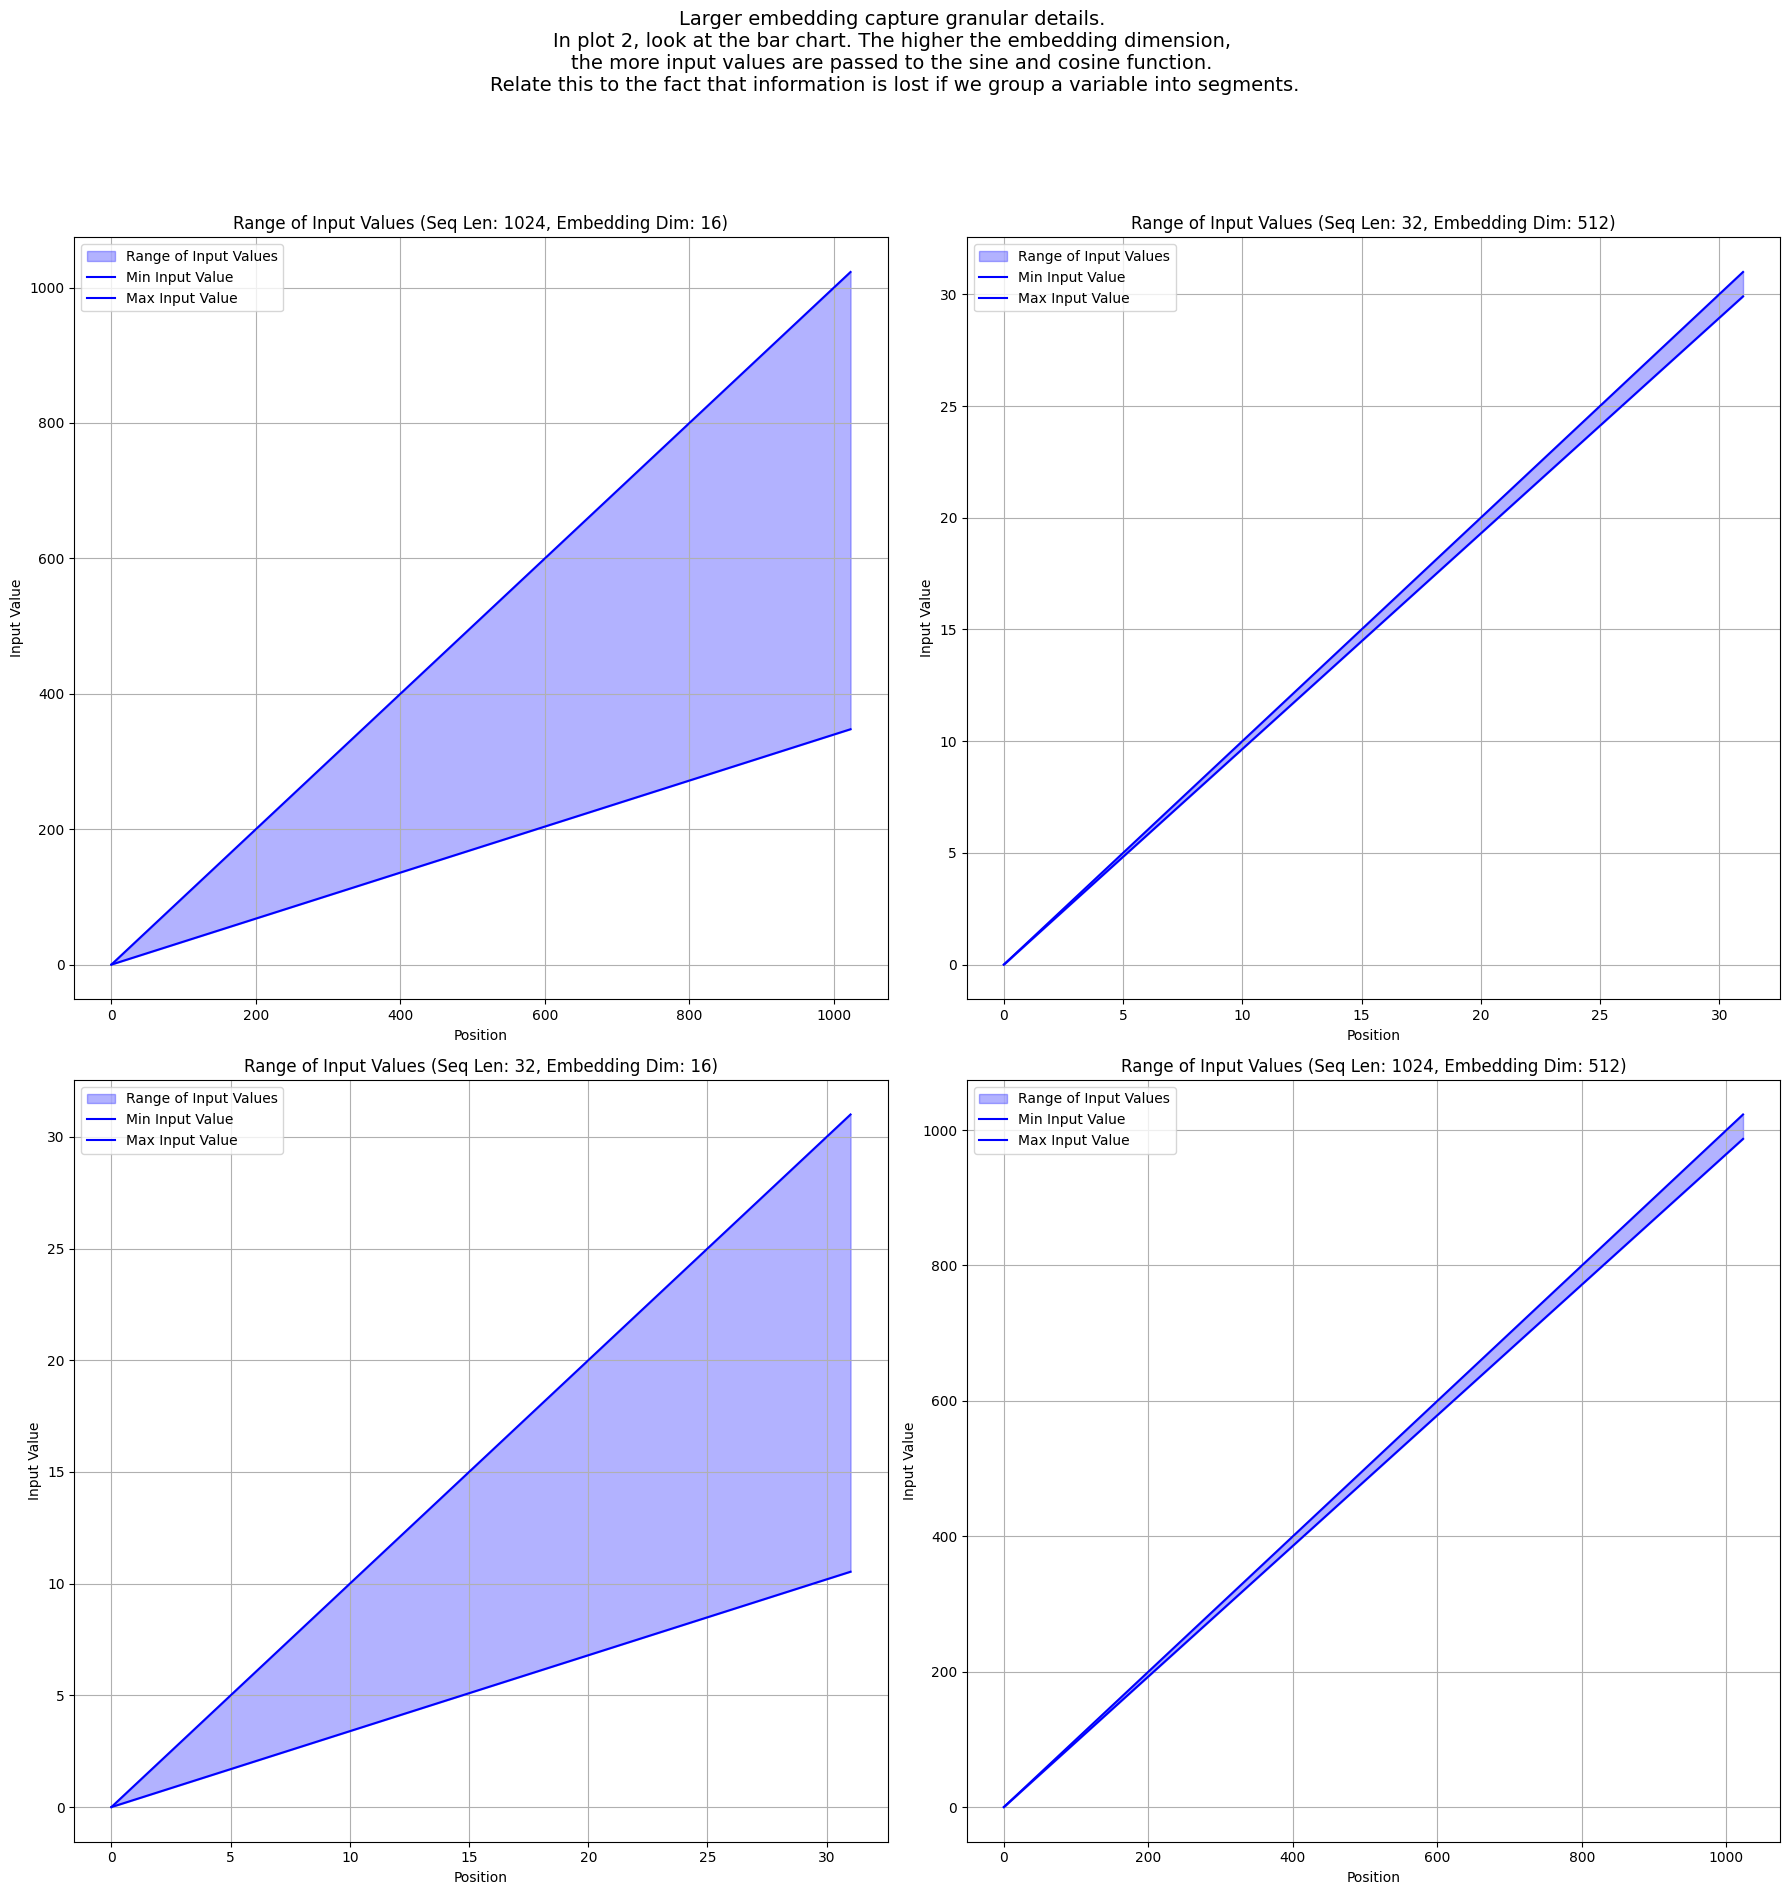

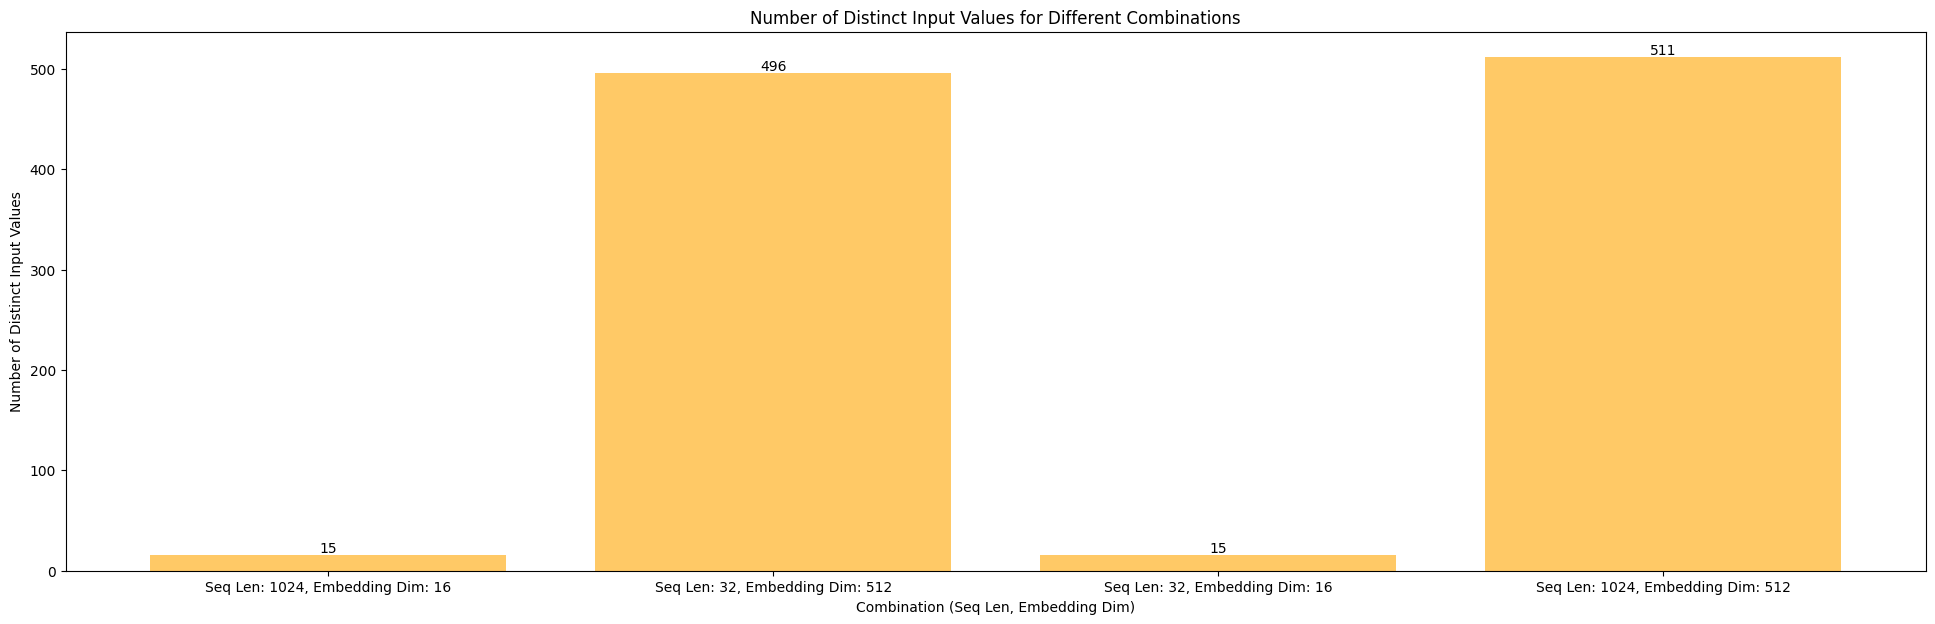

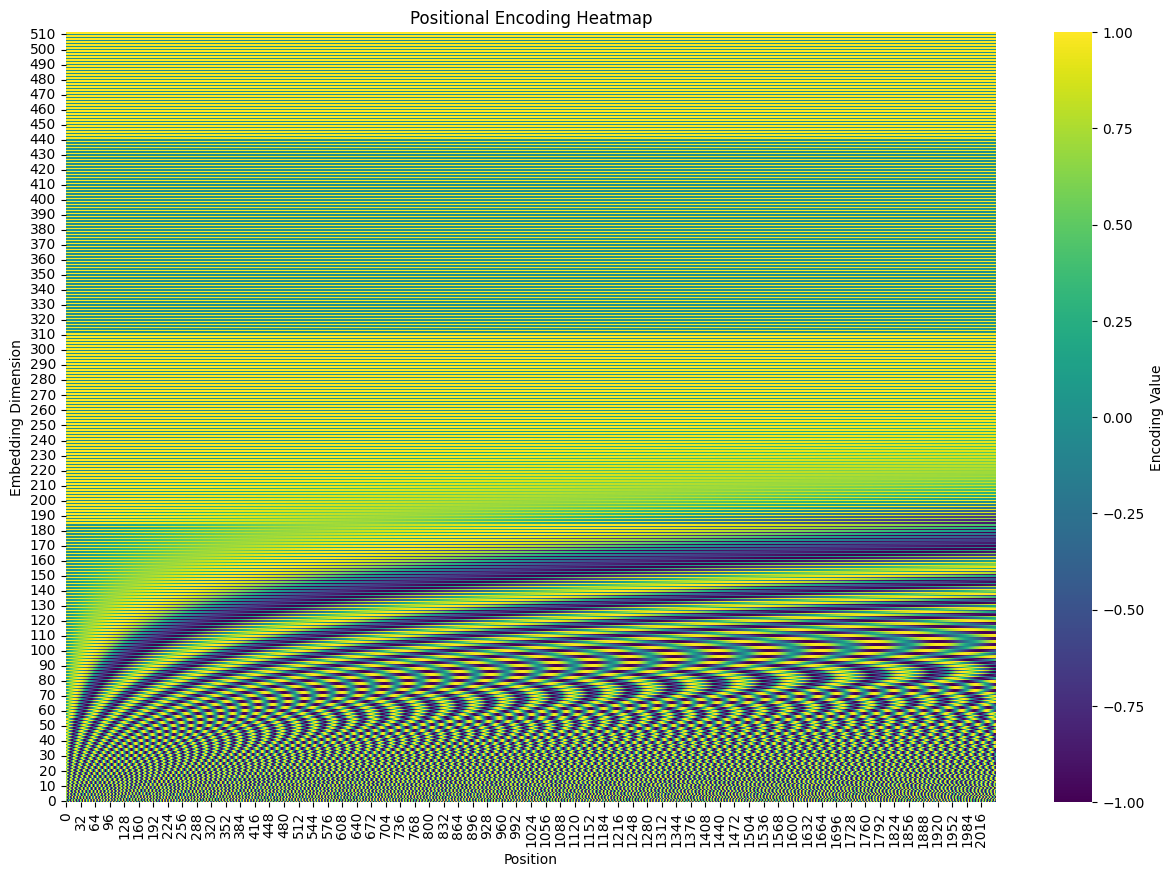

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_angle_rates(seq_len, embedding_dim):
    positions = np.arange(seq_len)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(embedding_dim) / embedding_dim  # (depth)
    angle_rates = 1 / np.power(10000, (2 * depths) / embedding_dim)  # (depth)
    angle_rads = positions * angle_rates[np.newaxis, :]  # (seq, depth)
    return angle_rads, positions.squeeze()

def get_positional_encoding(seq_len, embedding_dim):
    positional_encodings = np.zeros((seq_len, embedding_dim))
    for pos in range(seq_len):
        for i in range(0, embedding_dim, 2):
            positional_encodings[pos, i] = np.sin(pos / np.power(10000, (2 * i) / embedding_dim))
            if i + 1 < embedding_dim:
                positional_encodings[pos, i + 1] = np.cos(pos / np.power(10000, (2 * (i + 1)) / embedding_dim))
    return np.round(positional_encodings, 3)  # Round to three decimal places

def plot_positional_encoding_heatmap(positional_encodings):
    plt.figure(figsize=(15, 10))
    # ax = sns.heatmap(positional_encodings.T, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Encoding Value'})
    ax = sns.heatmap(positional_encodings.T, cmap='viridis', cbar_kws={'label': 'Encoding Value'})
    plt.title('Positional Encoding Heatmap')
    plt.xlabel('Position')
    plt.ylabel('Embedding Dimension')
    # print("Gopi")
    plt.gca().invert_yaxis()  # Invert the y-axis to display dimensions in the correct order
    plt.show()

# Example usage
seq_len = 2048  # Length of the sequence
embedding_dim = 512  # Dimension of the embeddings
angle_rads, positions = get_angle_rates(seq_len, embedding_dim)
positional_encodings = get_positional_encoding(seq_len, embedding_dim)

# Modify the position value dynamically based on the sequence length
dynamic_position = seq_len // 2  # For example, use the middle of the sequence

# Plot 1: Change input values with respect to change in embedding dimension, keeping position constant
embedding_dims = np.arange(embedding_dim)
input_values_dim = angle_rads[dynamic_position]

# Calculate corresponding sine and cosine values
sine_values_dim = np.sin(input_values_dim)
cosine_values_dim = np.cos(input_values_dim)

fig, axs = plt.subplots(3, 2, figsize=(18, 18))  # Increased height

positions_to_plot = np.linspace(0, seq_len - 1, 6, dtype=int)

# positions_to_plot = [0, 2, 4, 6, 8, 9]  # Chosen positions to cover the complete sequence length

all_handles, all_labels = [], []

for idx, dynamic_position in enumerate(positions_to_plot):
    row = idx // 2
    col = idx % 2

    input_values_dim = angle_rads[dynamic_position]
    sine_values_dim = np.sin(input_values_dim)
    cosine_values_dim = np.cos(input_values_dim)

    ax1 = axs[row, col]

    line1, = ax1.plot(embedding_dims, input_values_dim, marker='o', linestyle='-', color='b', label='Input Values')
    ax1.set_xlabel('Embedding Dimension')
    ax1.set_ylabel('Input Value', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    bar_width = 0.35
    bar1 = ax2.bar(embedding_dims - bar_width/2, sine_values_dim, width=bar_width, color='r', alpha=0.6, label='Sine Values')
    bar2 = ax2.bar(embedding_dims + bar_width/2, cosine_values_dim, width=bar_width, color='g', alpha=0.6, label='Cosine Values')
    ax2.set_ylabel('Sine/Cosine Value', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    ax2.set_ylim(-1, 1)
    ax1.set_title(f'Input, Sine, and Cosine Values at Position {dynamic_position}')

    # Collect handles and labels for the legend
    if idx == 1:
        handles, labels = ax1.get_legend_handles_labels()
        all_handles.extend([line1])
        all_labels.extend(['Input Values'])
        all_handles.extend([bar1[0], bar2[0]])
        all_labels.extend(['Sine Values', 'Cosine Values'])

# Create a legend at the top
# Main title
# Combined title
fig.suptitle('Input, Sine, and Cosine Values at Different Positions\n'
             '**Larger positions capture more cycles, which means more pattern can be learned.**\n'
             'In Plot 1:\n'
             '- Compare the cycles for different positions.\n'
             '- Position 0: There is no pattern.\n'
             '- Position 818: There is a more repetitive pattern, and likewise for increased positions.',
             y=1.05, fontsize=14)

# Legend on the right
fig.legend(all_handles, all_labels, loc='upper right', ncol=3, bbox_to_anchor=(1.05, 1.05))

fig.tight_layout(rect=[0, 0, 1, 0.58])  # Adjust the rect to fit the title and legend
plt.tight_layout()
plt.show()

# Plot 2: Range of input values by position

def plot_input_value_ranges(ax, seq_len, embedding_dim):
    angle_rads, positions = get_angle_rates(seq_len, embedding_dim)
    min_input_values = angle_rads.min(axis=1)
    max_input_values = angle_rads.max(axis=1)
    
    ax.fill_between(positions, min_input_values, max_input_values, color='blue', alpha=0.3, label='Range of Input Values')
    ax.plot(positions, min_input_values, color='blue', linestyle='-', label='Min Input Value')
    ax.plot(positions, max_input_values, color='blue', linestyle='-', label='Max Input Value')
    ax.set_title(f'Range of Input Values (Seq Len: {seq_len}, Embedding Dim: {embedding_dim})')
    ax.set_xlabel('Position')
    ax.set_ylabel('Input Value')
    ax.legend(loc='upper left')
    ax.grid(True)
    
    num_distinct_input_values = [len(np.unique(angle_rads[i, :])) for i in range(angle_rads.shape[0])]
    return num_distinct_input_values

# Define combinations of seq_len and embedding_dim based on the new criteria
combinations = [
    (1024, 16),   # High seq_len, low embedding_dim
    (32, 512),    # Low seq_len, high embedding_dim
    (32, 16),     # Low seq_len, low embedding_dim
    (1024, 512)   # High seq_len, high embedding_dim
]

fig, axs = plt.subplots(2, 2, figsize=(18, 18))  # 2 rows, 2 columns

distinct_values_dict = {}

for i, (seq_len, embedding_dim) in enumerate(combinations):
    row = i // 2
    col = i % 2
    num_distinct_input_values = plot_input_value_ranges(axs[row, col], seq_len, embedding_dim)
    distinct_values_dict[f'Seq Len: {seq_len}, Embedding Dim: {embedding_dim}'] = np.mean(num_distinct_input_values)

fig.suptitle('Larger embedding capture granular details. \n'
             'In the bar plot below. The higher the embedding dimension, the more input values are passed to the sine and cosine function. \n'
             'Relate this to the fact that information is lost if we group a variable into segments.',
             'Also, higher the dimension, lesser the input value range, 1.e. less fluctuating or more smoothing vice versa other wise. Refer the four subplots'
             y=1.05, fontsize=14)

fig.tight_layout()
plt.show()

# Plot the number of distinct input values for each combination in a separate figure
comb_labels = list(distinct_values_dict.keys())
distinct_values = list(distinct_values_dict.values())

plt.figure(figsize=(24, 7))
bars = plt.bar(comb_labels, distinct_values, color='orange', alpha=0.6)
plt.title('Number of Distinct Input Values for Different Combinations')
plt.xlabel('Combination (Seq Len, Embedding Dim)')
plt.ylabel('Number of Distinct Input Values')
plt.xticks(rotation=0, ha='center')

# Add data labels to the bars
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()

# # Plot 4: Average difference in input values by position with color coding
# avg_diff_values = np.mean(np.abs(np.diff(angle_rads, axis=0)), axis=1)

# plt.figure(figsize=(15, 6))
# for i in range(len(positions) - 1):
#     color = 'red' if positions[i] % 2 == 0 else 'blue'  # Color code: red for even, blue for odd positions
#     plt.scatter(positions[i], avg_diff_values[i], color=color, alpha=0.6)

# plt.title('Average Difference in Input Values by Position (Scatter Plot)')
# plt.xlabel('Position')
# plt.ylabel('Average Difference')
# plt.grid(True)
# plt.show()

# Plot 5: Positional Encoding Heatmap
plot_positional_encoding_heatmap(positional_encodings)